# Sentiment Analysis

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## read data

In [3]:
import pandas as pd
test = pd.read_csv('testdata.manual.2009.06.14.csv')
test.shape

(497, 6)

In [5]:
import chardet
import pandas as pd

with open('training.1600000.processed.noemoticon.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
train = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding=result['encoding'])
train.shape

(1599999, 6)

## add name for columns

In [6]:
train.columns=["label","id","date","query","name","tweet"]
test.columns=["label","id","date","query","name","tweet"]

## datasets preview

In [7]:
train.head(20)

,label,id,date,query,name,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [8]:
test.head(20)

,label,id,date,query,name,tweet
0,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
1,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
2,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
3,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
4,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...
5,0,9,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non lo...
6,4,10,Mon May 11 03:26:10 UTC 2009,jquery,dcostalis,Jquery is my new best friend.
7,4,11,Mon May 11 03:27:15 UTC 2009,twitter,PJ_King,Loves twitter
8,4,12,Mon May 11 03:29:20 UTC 2009,obama,mandanicole,how can you not love Obama? he makes jokes abo...
9,2,13,Mon May 11 03:32:42 UTC 2009,obama,jpeb,Check this video out -- President Obama at the...


In [9]:
def tokenizer(text):

    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return tokens
    

In [10]:
def preprocess(text):

    tokens = tokenizer(text)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    text = ' '.join(tokens)
    
    return text


### apply preprocess to tweet column in train dataset

In [11]:
train['tweet'] = train['tweet'].apply(preprocess)

In [12]:
train.head()

,label,id,date,query,name,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant updat facebook text might cri resul...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dive mani time ball manag save rest g...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole bodi feel itchi like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behav im mad cant see
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,kwesidei whole crew


## CountVectorizer

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

X_train = train['tweet']
y_train = train['label']

vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)

## train model

In [14]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vect, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## predict

In [50]:
selected_test = test[test['label'] != 2]
X_test = selected_test['tweet']
X_test = vectorizer.transform(X_test)

y_test = selected_test['label']

y_pred = model.predict(X_test)
y_pred

array([4, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 0, 4, 4, 0, 4,
       0, 4, 0, 4, 4, 0, 4, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 4, 0, 0,
       4, 4, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 0, 4, 4, 4, 0,
       0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0,
       0, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0, 0,
       4, 4, 0, 4, 0, 4, 0, 0, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 4, 4, 0, 4, 4, 0, 4, 0, 4, 4, 0, 4,
       0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 4, 4, 4, 4, 4, 4,
       4, 0, 0, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 0, 4, 0, 0, 0, 4, 4, 4,
       4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0,

In [49]:
len(y_train[y_train == 0]), len(y_train[y_train == 2]), len(y_train[y_train == 4])

(799999, 0, 800000)

In [43]:
len(y_test[y_test == 0]), len(y_test[y_test == 2]), len(y_test[y_test == 4])

(177, 0, 181)

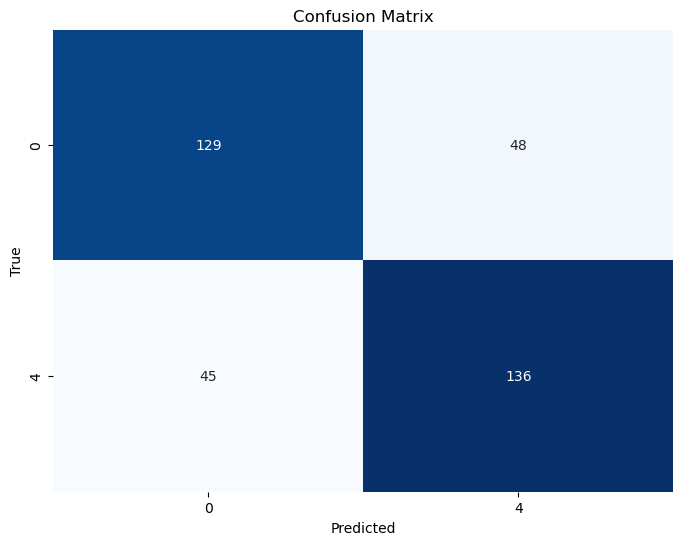

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

classes = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print(accuracy,precision,recall)

0.7402234636871509 0.7402548725637181 0.7400973873958235


# labels=[0,2,4]

In [46]:
from sklearn.metrics import accuracy_score
X_test = test['tweet']
X_test = vectorizer.transform(X_test)
y_test = test['label']

y_pred = model.predict(X_test)

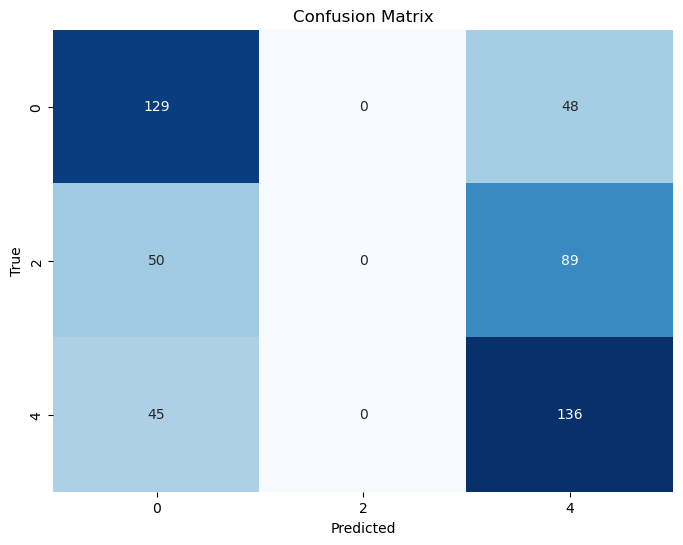

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

classes = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()